# Vanishing Gradient Problem

![vanishing](https://www.kdnuggets.com/wp-content/uploads/vanishing-gradient-problem-12.png)

https://medium.com/@El_Fares_Anass/a-basic-explanation-how-the-gradient-descent-is-determined-during-back-propagation-864376f8f1a4

https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html

https://kharshit.github.io/blog/2019/01/04/the-gradient-problem-in-rnn

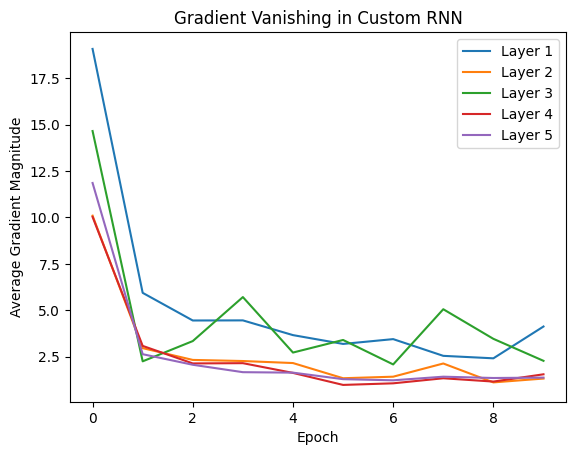

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate some toy data
X = np.random.randn(1000, 10, 1)  # 1000 sequences of length 10, each with 1 feature
y = np.random.randint(0, 2, size=(1000, 1))  # Binary classification labels, reshaped

# Define a custom RNN model
class CustomRNNModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomRNNModel, self).__init__()
        self.depth = depth
        self.rnn_layers = [tf.keras.layers.SimpleRNN(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.rnn_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom RNN model
units = 10
depth = 5
model_rnn = CustomRNNModel(units=units, depth=depth)

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_rnn)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_rnn.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom RNN')
plt.legend()
plt.show()


## GRU

![gru](https://miro.medium.com/v2/resize:fit:846/format:webp/1*i-yqUwAYTo2Mz-P1Ql6MbA.png)

https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2

https://d2l.ai/chapter_recurrent-modern/gru.html

https://github.com/kaustubhhiware/LSTM-GRU-from-scratch/blob/master/module.py

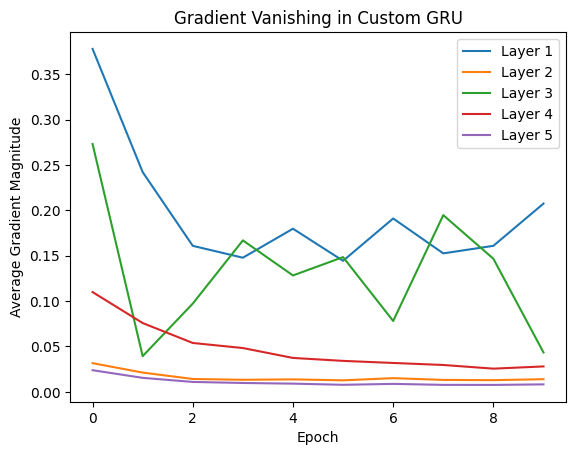

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom GRU model
class CustomGRUModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomGRUModel, self).__init__()
        self.depth = depth
        self.gru_layers = [tf.keras.layers.GRU(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.gru_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom GRU model
units = 10
depth = 5
model_gru = CustomGRUModel(units=units, depth=depth)

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_gru)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_gru.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom GRU')
plt.legend()
plt.show()


## LSTM

![lstm](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*J5W8FrASMi93Z81NlAui4w.png)

https://d2l.ai/chapter_recurrent-modern/lstm.html

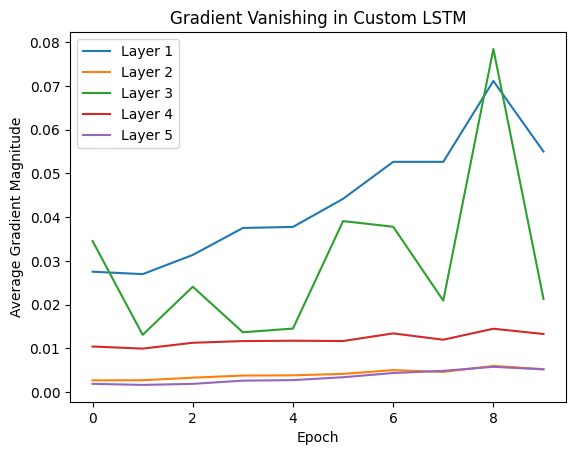

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom LSTM model
class CustomLSTMModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomLSTMModel, self).__init__()
        self.depth = depth
        self.lstm_layers = [tf.keras.layers.LSTM(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.lstm_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom LSTM model
units = 10
depth = 5
model_lstm = CustomLSTMModel(units=units, depth=depth)

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_lstm)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_lstm.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom LSTM')
plt.legend()
plt.show()


## Comparison

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

# Generate some toy data
X = np.random.randn(1000, 1000, 100)  # 1000 sequences of length 1000, each with 100 features
y = np.random.randint(0, 2, size=(1000,))  # Binary classification labels

# Define a simple RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1000, 100), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the model
history_rnn = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 2s 40ms/step - loss: 0.7967 - accuracy: 0.4960
Epoch 2/10
32/32 [==============================] - 1s 40ms/step - loss: 0.7560 - accuracy: 0.5160
Epoch 3/10
32/32 [==============================] - 1s 40ms/step - loss: 0.7266 - accuracy: 0.5310
Epoch 4/10
32/32 [==============================] - 1s 40ms/step - loss: 0.7043 - accuracy: 0.5580
Epoch 5/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6857 - accuracy: 0.5780
Epoch 6/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6696 - accuracy: 0.6070
Epoch 7/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6559 - accuracy: 0.6130
Epoch 8/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6434 - accuracy: 0.6350
Epoch 9/10
32/32 [==============================] - 1s 39ms/step - loss: 0.6315 - accuracy: 0.6550
Epoch 10/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6206 - accuracy: 0.6670


In [5]:
from keras.layers import LSTM

# Define an LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1000, 100), return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 4s 84ms/step - loss: 0.7080 - accuracy: 0.4660
Epoch 2/10
32/32 [==============================] - 3s 85ms/step - loss: 0.6917 - accuracy: 0.5170
Epoch 3/10
32/32 [==============================] - 3s 85ms/step - loss: 0.6795 - accuracy: 0.5510
Epoch 4/10
32/32 [==============================] - 3s 84ms/step - loss: 0.6677 - accuracy: 0.5850
Epoch 5/10
32/32 [==============================] - 3s 84ms/step - loss: 0.6557 - accuracy: 0.6360
Epoch 6/10
32/32 [==============================] - 3s 84ms/step - loss: 0.6423 - accuracy: 0.6710
Epoch 7/10
32/32 [==============================] - 3s 84ms/step - loss: 0.6275 - accuracy: 0.7010
Epoch 8/10
32/32 [==============================] - 3s 86ms/step - loss: 0.6108 - accuracy: 0.7330
Epoch 9/10
32/32 [==============================] - 3s 86ms/step - loss: 0.5921 - accuracy: 0.7610
Epoch 10/10
32/32 [==============================] - 3s 84ms/step - loss: 0.5710 - accuracy: 0.7970


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_4772/1943434190.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_4772/1943434190.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних


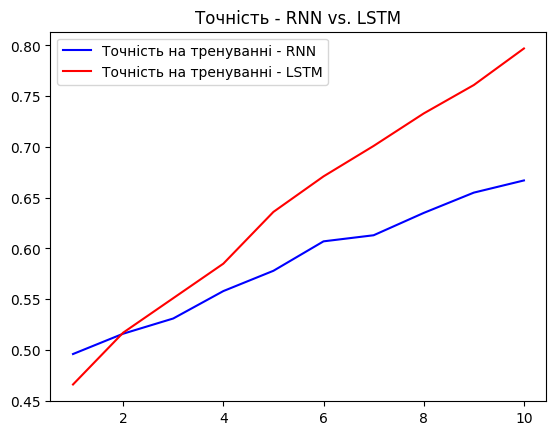

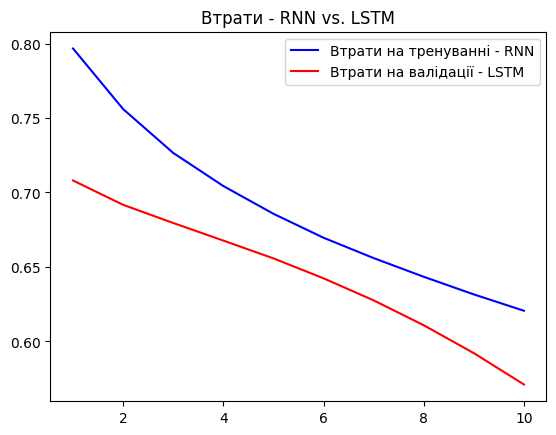

In [6]:
acc_rnn = history_rnn.history['accuracy']
loss_rnn = history_rnn.history['loss']

acc_lstm = history_lstm.history['accuracy']
loss_lstm = history_lstm.history['loss']


epochs = range(1, len(acc_rnn) + 1)

plt.plot(epochs, acc_rnn, 'b', label='Точність на тренуванні - RNN')  # Графік точності на тренувальних данних
plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
plt.title('Точність - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss_rnn, 'b', label='Втрати на тренуванні - RNN')  # Графік втрат на тренувальних данних
plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних
plt.title('Втрати - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [7]:
# Introduce long-range dependencies


# Define long-range dependencies
for i in range(len(X)):
    if np.random.rand() < 0.2:  # Introduce a long-range dependency in 20% of sequences
        X[i, 500:, 0] += 5.0  # Add a large value to the second half of the sequence
        y[i] = 1

# Define and train the simple RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1000, 100), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
history_rnn_long = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 2s 40ms/step - loss: 0.7367 - accuracy: 0.5290
Epoch 2/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6782 - accuracy: 0.5900
Epoch 3/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6387 - accuracy: 0.6310
Epoch 4/10
32/32 [==============================] - 1s 39ms/step - loss: 0.6086 - accuracy: 0.6480
Epoch 5/10
32/32 [==============================] - 1s 40ms/step - loss: 0.5846 - accuracy: 0.6700
Epoch 6/10
32/32 [==============================] - 1s 39ms/step - loss: 0.5637 - accuracy: 0.6960
Epoch 7/10
32/32 [==============================] - 1s 39ms/step - loss: 0.5455 - accuracy: 0.7080
Epoch 8/10
32/32 [==============================] - 1s 39ms/step - loss: 0.5289 - accuracy: 0.7180
Epoch 9/10
32/32 [==============================] - 1s 39ms/step - loss: 0.5147 - accuracy: 0.7340
Epoch 10/10
32/32 [==============================] - 1s 40ms/step - loss: 0.5014 - accuracy: 0.7410


In [8]:
# Define and train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1000, 100), return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
history_lstm_long = model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 4s 87ms/step - loss: 0.6944 - accuracy: 0.5250
Epoch 2/10
32/32 [==============================] - 3s 86ms/step - loss: 0.6481 - accuracy: 0.6210
Epoch 3/10
32/32 [==============================] - 3s 85ms/step - loss: 0.6099 - accuracy: 0.6580
Epoch 4/10
32/32 [==============================] - 3s 84ms/step - loss: 0.5741 - accuracy: 0.6790
Epoch 5/10
32/32 [==============================] - 3s 87ms/step - loss: 0.5427 - accuracy: 0.7040
Epoch 6/10
32/32 [==============================] - 3s 86ms/step - loss: 0.5157 - accuracy: 0.7340
Epoch 7/10
32/32 [==============================] - 3s 87ms/step - loss: 0.4908 - accuracy: 0.7630
Epoch 8/10
32/32 [==============================] - 3s 85ms/step - loss: 0.4666 - accuracy: 0.7850
Epoch 9/10
32/32 [==============================] - 3s 86ms/step - loss: 0.4416 - accuracy: 0.8230
Epoch 10/10
32/32 [==============================] - 3s 86ms/step - loss: 0.4162 - accuracy: 0.8350


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_4772/1344728566.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_4772/1344728566.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних


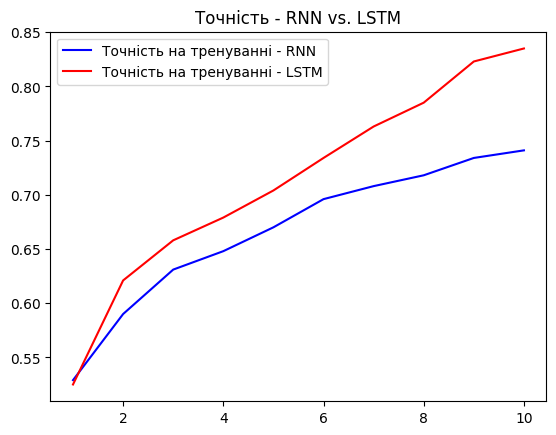

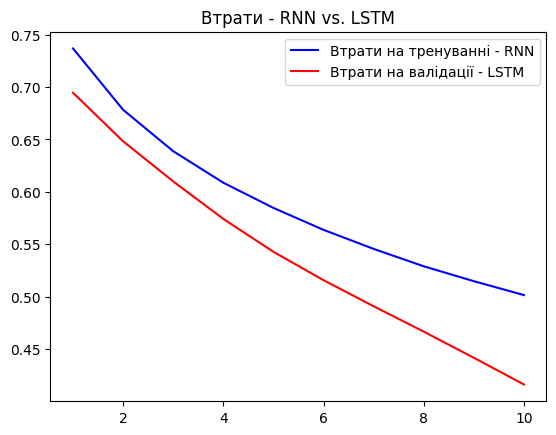

In [9]:
acc_rnn = history_rnn_long.history['accuracy']
loss_rnn = history_rnn_long.history['loss']

acc_lstm = history_lstm_long.history['accuracy']
loss_lstm = history_lstm_long.history['loss']


epochs = range(1, len(acc_rnn) + 1)

plt.plot(epochs, acc_rnn, 'b', label='Точність на тренуванні - RNN')  # Графік точності на тренувальних данних
plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
plt.title('Точність - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss_rnn, 'b', label='Втрати на тренуванні - RNN')  # Графік втрат на тренувальних данних
plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних
plt.title('Втрати - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# Usage

In [ ]:
# from here: https://colab.research.google.com/drive/1R5VfJLZU0ZvYBRPAWBvLe6GSB3DReI55#scrollTo=W9LoZJdNpWLK

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
num_words = 10000  # Consider only the top 10,000 words
maxlen = 200  # Limit the maximum review length to 200 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Define the LSTM model
embedding_dim = 128
lstm_units = 64
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()